# Recharge between Rivers #

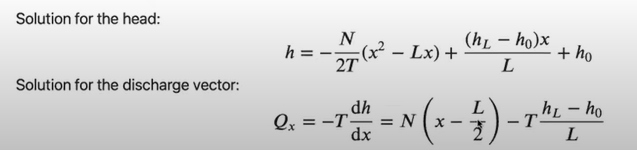

In [3]:
import numpy as np

from matplotlib import pyplot as plt


In [4]:
## Input Variables ##
L = 1000 # Aquifer Length, in meters # 

H = 10 # Saturated Thickness, in meters # 

zb = -5 # Aquifer bottom, in meters # 

k = 10 # Hydraulic conductivity, meters/day, defined as the unit volume per time flow can occur through substrate #

n = 0.3 # Porosity, pore space in substrate, units is a fraction between 0 and 1, portion of #

T = k * H # Transmissivity, m^2/ day #

h0 = 6 # specified head at left side of the boundary, meters #

hL = 4 # Specified head at right side of the boundary, meters # 

N = .001 # Arreal recharge, meters/day # 


In [5]:
x = np.linspace(0, L, 100) # Numpy Linspace returns a set of evenly distributed numbers over (start, end, desired # of points)

# Head: # 
h = -N / (2 * T) * (x**2 - L * x) + (hL - h0) * x / L + h0

# Discharge: # 
Qx = N * (x - L / 2) - T * (hL - h0) / L


Text(0, 0.5, '$Q_x$ (m$^2$/d)')

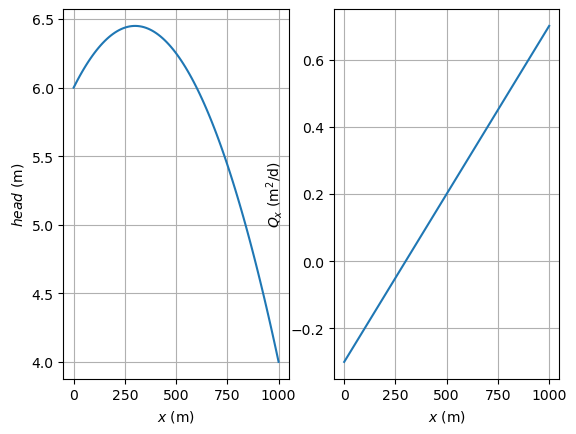

In [6]:
# Data Visualization with matplotlib.pyplot # 
plt.subplot(121) # Graph number 1 #

plt.plot(x, h) # x horizontal length and head, # 

plt.grid()

plt.xlabel('$x$ (m)')

plt.ylabel('$head$ (m)')

plt.subplot(122)

plt.plot(x, Qx)

plt.grid()

plt.xlabel('$x$ (m)')

plt.ylabel('$Q_x$ (m$^2$/d)')



In [7]:
print(f'discharge into left river: {Qx[0]: .3f} m^2/day') # Quantifying the amount of discharge into both rivers

print(f'discharge into right river: {Qx[-1]: .3f} m^2/day')


discharge into left river: -0.300 m^2/day
discharge into right river:  0.700 m^2/day


In [8]:
# Solution Specific Discharge Vector # 

xg, zg = np.meshgrid(np.linspace(0, L, 10), np.linspace(zb, zb + H, 5))

qx = (N * (xg - L / 2) - T * (hL - h0) / L) / H

qz = -N * (zg - zb) / H 


Text(0, 0.5, '$z$ (m) - VE = 25')

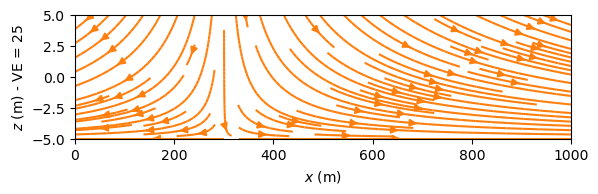

In [9]:
# Stream Plot # 
plt.subplot(111, aspect = 25)

plt.streamplot(xg, zg, qx, qz, color = 'C1')

plt.ylim(zb, zb + H)

plt.xlabel('$x$ (m)')

plt.ylabel('$z$ (m) - VE = 25')

